In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=UserWarning)

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

# Pacotes utilizados

In [2]:
import pandas as pd
import numpy as np
import interfacespfy as isp
import altair as alt
import seaborn as sns
import bokeh as bkh
import missingno as msno
import matplotlib.pyplot as plt

## Fazendo login no spotify e baixando musicas salvas

In [3]:
spfy = isp.login_user('belzedu')
musics = isp.get_favorite_songs(spfy)

In [4]:
pdmusics = pd.DataFrame(musics)
pdmusics.set_index(['id'], inplace=True)
print("Quantidade de musicas baixadas:", pdmusics.shape[0])
pdmusics.head()

Quantidade de musicas baixadas: 564


,album,album_id,artist,artist_id,duration_ms,name,popularity
id,,,,,,,
08JTB5hpXPCVPGJzic8E9e,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,Bee-Sting,42
7v9Ne4758aGFfFc5avh89h,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,Let's Dance To Joy Division,65
4w9TBRGhvbhiLQB8jVCusl,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,Cheetah Tongue,63
11IJA30efHAJLO3qroPh5L,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,Turn,63
7GvkOFkNsM6Exnkyqeajqm,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,Moving To New York,64


In [5]:
# Obtendo dados de características musicais 
saved_songs_feat = isp.get_favorite_songs(spfy, features=True)

## Descrição das colunas

- **acousticness**: Valor de 0 a 1 que indica se há som de audiência na música. Um valor de 1 indica maior certeza da presença de público na gravação e vice-versa.
- **danceability**: Valor de 0 a 1 que indica se a música é favorável para dançar de acordo com características musicais como setabilidade ritimica.
- Adicionar outras

In [6]:
df_ssongs = pd.DataFrame(saved_songs_feat).set_index('id')
print("Quantidade de musicas salvas:", df_ssongs.shape[0])
df_ssongs.head()

Quantidade de musicas salvas: 564


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
id,,,,,,,,,,,
08JTB5hpXPCVPGJzic8E9e,0.045700,0.650,0.866,0.000000,11,0.0682,-3.713,1,0.0343,115.001,0.717
7v9Ne4758aGFfFc5avh89h,0.001250,0.397,0.839,0.000000,4,0.5760,-6.674,1,0.1020,116.947,0.764
4w9TBRGhvbhiLQB8jVCusl,0.042600,0.533,0.967,0.000432,2,0.1320,-3.066,1,0.0570,95.008,0.603
11IJA30efHAJLO3qroPh5L,0.007430,0.531,0.847,0.000000,1,0.0916,-3.907,1,0.0529,105.030,0.380
7GvkOFkNsM6Exnkyqeajqm,0.000029,0.252,0.886,0.000005,9,0.2560,-4.678,0,0.0714,161.939,0.498


## Unindo os dados em um unico dataframe

In [7]:
df_ssongsdata = pd.DataFrame(musics).set_index('id')
edu_songs = df_ssongsdata.join(df_ssongs)
print("Exemplo de amostra apos juntar tabelas:")
edu_songs['user'] = 'edujtm'
edu_songs.iloc[1].T

Exemplo de amostra apos juntar tabelas:


album               Proudly Present....A Guide To Love, Loss & Des...
album_id                                       75l5Bqvc0BH45UhJrS04Xj
artist                                                    The Wombats
artist_id                                      0Ya43ZKWHTKkAbkoJJkwIB
duration_ms                                                    191293
name                                      Let's Dance To Joy Division
popularity                                                         65
acousticness                                                  0.00125
danceability                                                    0.397
energy                                                          0.839
instrumentalness                                                    0
key                                                                 4
liveness                                                        0.576
loudness                                                       -6.674
mode                

## Lendo as playlists do Gabriel

In [8]:
# Essas linhas foram removidas devido o gabriel possuir muitas musicas
#gabriel_mfeat = isp.get_user_playlists(spfy, '12144777067', features=True)
#gabriel_mdata = isp.get_user_playlists(spfy, '12144777067')alt

gabriel_songs = pd.read_csv('../csvfiles/gabriel_playlists.csv')
print("Quantidade de musicas:", gabriel_songs.shape[0])
gabriel_songs['user'] = 'gfeli'
gabriel_songs.iloc[1].T

Quantidade de musicas: 5936


Unnamed: 0                               2
acousticness                       0.00591
danceability                         0.398
energy                               0.939
id                  5hheGdf1cb4rK0FNiedCfK
instrumentalness                  0.000881
key                                      9
liveness                             0.357
loudness                            -2.865
mode                                     0
speechiness                         0.0648
tempo                               92.027
valence                              0.235
duration_ms                         342821
name                        The Devil In I
popularity                              70
user                                 gfeli
Name: 1, dtype: object

In [9]:
## Unindo os dataframes de ambos os usuários
all_songs = edu_songs.append(gabriel_songs[:564])
print("Quantidade de dados após unir frames:", all_songs.shape[0])
all_songs.head()

Quantidade de dados após unir frames: 1128


,Unnamed: 0,acousticness,album,album_id,artist,artist_id,danceability,duration_ms,energy,id,...,key,liveness,loudness,mode,name,popularity,speechiness,tempo,user,valence
08JTB5hpXPCVPGJzic8E9e,NaN,0.045700,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,0.650,214432,0.866,NaN,...,11,0.0682,-3.713,1,Bee-Sting,42,0.0343,115.001,edujtm,0.717
7v9Ne4758aGFfFc5avh89h,NaN,0.001250,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,0.397,191293,0.839,NaN,...,4,0.5760,-6.674,1,Let's Dance To Joy Division,65,0.1020,116.947,edujtm,0.764
4w9TBRGhvbhiLQB8jVCusl,NaN,0.042600,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,0.533,219481,0.967,NaN,...,2,0.1320,-3.066,1,Cheetah Tongue,63,0.0570,95.008,edujtm,0.603
11IJA30efHAJLO3qroPh5L,NaN,0.007430,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,0.531,207679,0.847,NaN,...,1,0.0916,-3.907,1,Turn,63,0.0529,105.030,edujtm,0.380
7GvkOFkNsM6Exnkyqeajqm,NaN,0.000029,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,0.252,210560,0.886,NaN,...,9,0.2560,-4.678,0,Moving To New York,64,0.0714,161.939,edujtm,0.498


## Rápida análise integridade dos dados após unir as tabelas

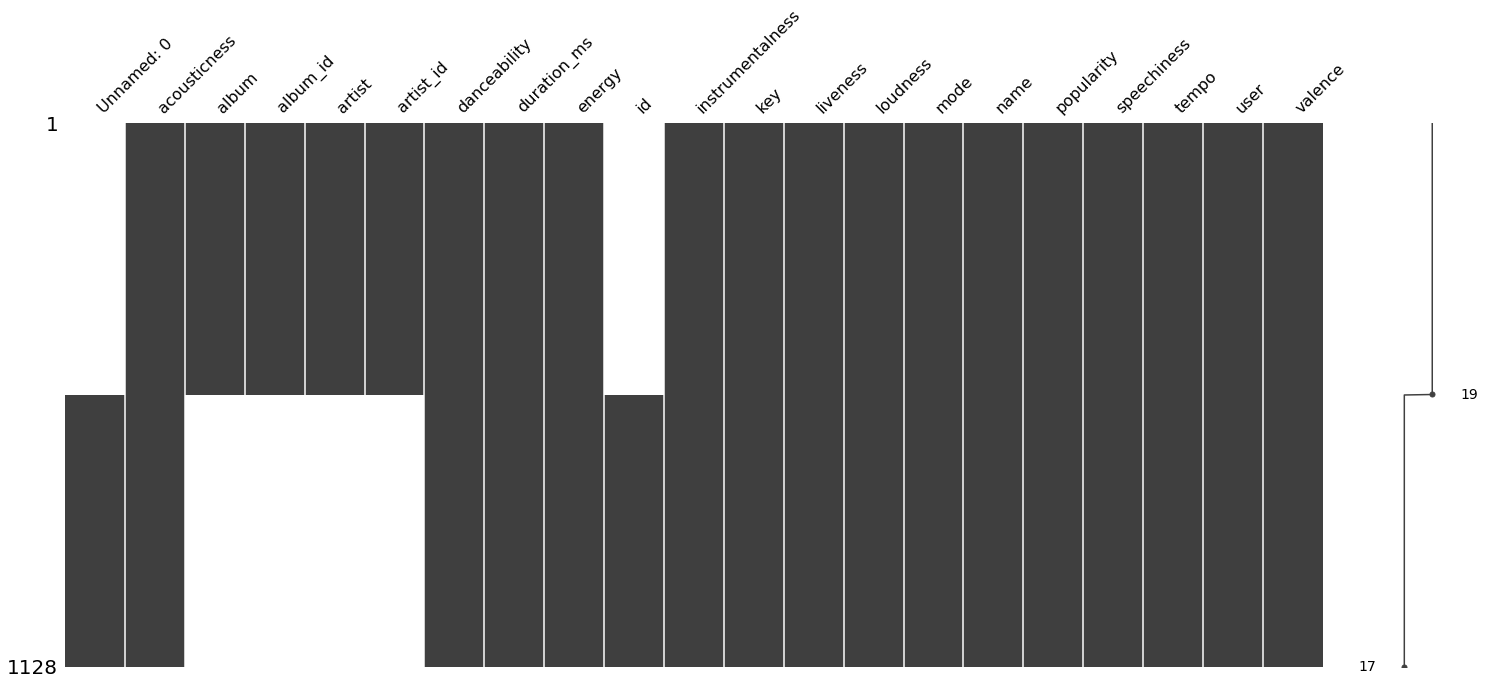

In [10]:
msno.matrix(all_songs)

# Buscando similaridades e diferenças significativas entre os dados

> O objetivo desta análise é encontrar possíveis diferenças entre os dados de ambos os dataframes que podem representar diferenças entre os
> gostos musicais de cada usuário. Tentaremos observar isso graficamente utilizando as bibliotecas do python.

In [20]:
def plot_similarities(data, variables):
    root = int(np.ceil(np.sqrt(len(variables))))
    fig, axis = plt.subplots(nrows=root, ncols=root, figsize=(15, 15))
    
    numeric_categories = ["0.0 - 0.2",
                           "0.2 - 0.4",
                           "0.4 - 0.6",
                           "0.6 - 0.8",
                           "0.8 - 1.0",
                           ]
    fig.suptitle('Comparando distribuições para as características das musicas')
    for idx, column in enumerate(variables):
        i, j = idx % root, idx // root
        ax = axis[j][i]
        
        grouped = data.groupby('user')[[column, 'user']]
        
        for user, group in grouped:
            # pd.qcut(group[column].rank(method='first'), len(numeric_categories), numeric_categories)
            sns.distplot(group[column], ax=ax, label=user)
        ax.legend()
    plt.show()

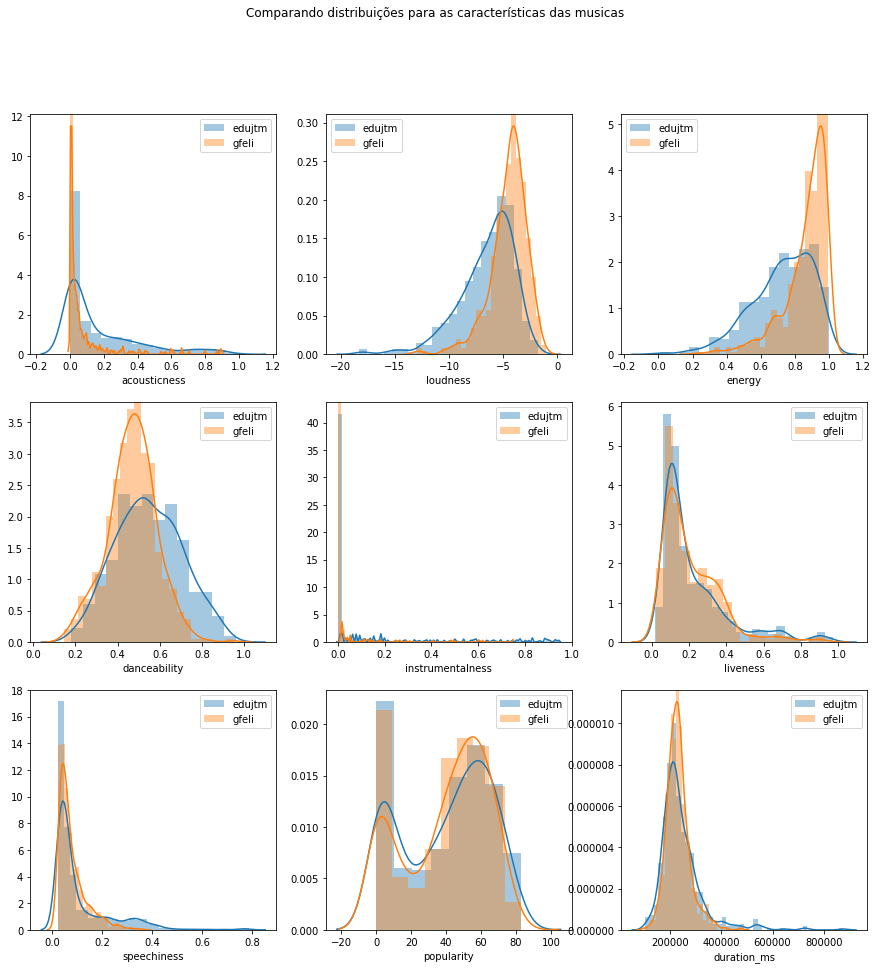

In [22]:
warnings.filterwarnings('ignore')
variables = ['acousticness', 'loudness', 'energy', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'popularity', 'duration_ms']
plot_similarities(all_songs, variables)

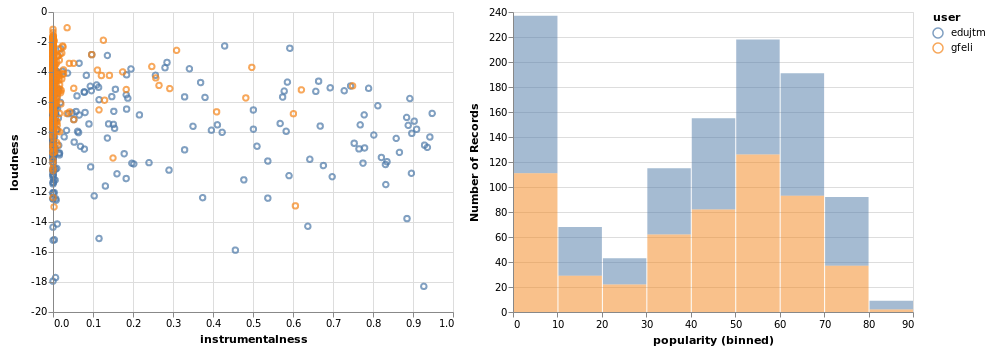

In [23]:
interval = alt.selection_interval()

data = alt.Chart(all_songs).mark_point().encode(
    x='instrumentalness',
    y='loudness',
    tooltip=['name', 'popularity'],
    color=alt.condition(interval, 'user:N', alt.value('lightgray')),
).properties(
    selection=interval
)

popularity = alt.Chart(all_songs).mark_bar(opacity=0.5).encode(
    x=alt.X('popularity', bin=True),
    y='count()',
    color='user'
).transform_filter(
    interval
)

data | popularity